# <span style="color:blue"> Esercitazione 1 - Generatore di numeri casuali e prima simulazione numerica </span>

## <span style="color:blue"> Indice</span>

- [Esercizio 1.1 - Test sul generatore uniforme in \[0,1)](#Esercizio1.1)

- [Esercizio 1.2 - Estensione del generatore e verifica del teorema del limite centrale](#Esercizio1.2)

- [Esercizio 1.3 - Simulazione dell'esperimento dell'ago di Buffon](#Esercizio1.3)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import norm
from scipy.stats import chi2
from scipy.stats import cauchy

## <span id="Esercizio1.1" style="color:blue">  Esercizio 1.1 - Test sul generatore uniforme in \[0,1) </span>[^](#toc)

La capacità di generare numeri pseudo-casuali uniformemente distribuiti nell'intervallo $[0,1)$ è fondamentale per eseguire simulazioni Monte Carlo di fenomeni stocastici, poiché
- da essa segue la capacità di generare numeri casuali con distribuzione arbitraria;
- permette di simulare l'accadimento di un evento che ha una data probabilità di accadimento $p$.

Per questo motivo, è importante verificare con precisi criteri quantitativi la bontà del generatore di numeri casuali con distribuzione $U([0,1))$ che si intende impiegare nelle simulazioni. La distribuzione $U([0,1))$ è definita come
$$
U([0,1))(x)=\left\{
\begin{array}{l}
1 \quad \text{se } 0\le x<1,\\
0 \quad \text{altrimenti.}
\end{array}
\right.
$$

In questo esercizio è stato verificato il corretto funzionamento del generatore (da ora in poi chiamato RNG) implementato nella classe C++ `Random`, basato sull'algoritmo RANNYU. Sono stati svolti i tre test di seguito riportati e discussi.

### i. Stima del valor medio

Il primo test consiste nel verificare che il valor medio dei numeri generati sia statisticamente compatibile con il valor medio di $U([0,1))$.

Detto $\{r\}$ l'insieme dei numeri generati, ci si aspetta che
$$
<r>=\int{rU([0,1))(r)dr}=\int_0^1{rdr}=\frac{1}{2}
$$

Bisogna quindi generare molti numeri con `Random` e stimare $<r>$ e la relativa incertezza, $\sigma_{<r>}$:
- $<r>$ è la media aritmetica dei risultati del calcolo
- $\sigma_{<r>}$ è l'incertezza statistica del calcolo, data dalla deviazione standard della media per la stima di $<r>$ 

#### Nota sulla media a blocchi

Quando si esegue il calcolo dell'incertezza statistica di una grandezza ottenuta tramite calcolo Monte Carlo, bisogna considerare che è possibile che i valori di tale grandezza ricavati dopo ogni step non siano tutti statisticamente indipendenti tra loro.

Ad esempio, è possibile che ogni valore sia correlato a valori ottenuti fino ad alcuni step precedenti nel calcolo. In questo caso si ha una lunghezza di correlazione non nulla dei risultati di ogni step. Di conseguenza, non è possibile applicare metodi di stima dell'incertezza che trattano i dati come statisticamente indipendenti tra loro, come ad esempio quelli che sfruttano il CLT per calcolare l'incertezza come la deviazione standard della media dei risultati di ogni step.

Per eseguire correttamente il calcolo dell'incertezza statistica anche in presenza di correlazioni, è possibile ricorrere alla **media a blocchi** (_blocking average_ o _blocking method_):
- Si consideri una simulazione Monte Carlo che ad ogni step calcola il valore di una grandezza $A$. Sia $M$ il numero di step del calcolo, e si assuma che
    - i valori di $A$ ottenuti ai vari step siano correlati, con lunghezza di correlazione $l$
    - la distribuzione di questi valori appartenga al bacino di attrazione della gaussiana
- Si raggruppano tali valori in $N$ blocchi ($N<M$), ciascuno lungo $L$=$M/N$ valori. Si calcola il valor medio di $A$ per ciascun blocco (_block average_): $A_i, i=1,...,N$.
- Se $M$ è grande e la lunghezza $L$ dei blocchi è molto maggiore della lunghezza di correlazione dei risultati del calcolo Monte Carlo (di $l$), gli $A_i$ sono ottenuti come medie di molti numeri casuali, ciascuno correlato con un numero finito di numeri casuali. Il CLT in forma generalizzata è dunque valido per gli $A_i$: i valori $A_i$ ottenuti per ciascun blocco sono (approssimativamente) distribuiti con distribuzione gaussiana, con
    - Media = media della distribuzione dei risultati del calcolo
    - Deviazione standard = deviazione standard della distribuzione dei risultati del calcolo divisa per $\sqrt{L}$
- Potendo trattare gli $A_i$ come i veri risultati casuali del calcolo, scorrelati tra loro e distribuiti normalmente:
    - Si rappresenta la grandezza $A$ attraverso il valor medio degli $A_i$:
      $$
      <A>=\frac{\sum_{i=1}^N{A_i}}{N}
      $$
    - Si stima la sua incertezza come la deviazione standard della media degli $A_i$:
      $$
      \sigma_{<A>}=\frac{\sigma_A}{\sqrt{N-1}}=\sqrt{\frac{<A^2>-<A>^2}{N-1}}=\sqrt{\frac{\frac{1}{N}\sum_{i=1}^N{A_i^2}-(\frac{1}{N}\sum_{i=1}^N{A_i})^2}{N-1}}
      $$

Ad ogni risultato di un calcolo Monte Carlo sarà quindi associata un'incertezza calcolata tramite media a blocchi.

In questo caso, il risultato di ogni step del calcolo è semplicemente il numero pseudo-casuale $r$ generato dall'RNG. Sono state quindi calcolate le block average $r_i, i=1,...,N$, e poi la media $<r>$ (il risultato del calcolo) e la sua incertezza $\sigma_{<r>}$.

#### Calcolo e risultati

Parametri del calcolo
- $M=10^6$ step (numeri casuali generati)
- $N=10^3$ blocchi
- Lunghezza di ciascun blocco: $L=M/N=10^3$

Sono stati calcolati i valori di $<r>$ e $\sigma_{<r>}$ _progressivi_, cioè calcolati man mano che vengono generati i blocchi:
$$<r>_n=\frac{1}{n}\sum_{i=1}^n{r_i} \qquad \mathrm{e} \qquad  \sigma_{<r>_n}=\sqrt{\frac{<r^2>_n-<r>_n^2}{n-1}} \qquad \qquad \mathrm{per} \quad n=1,...,N$$

Di seguito è mostrato l'andamento della media progressiva $<r>_n$ in funzione del numero di blocchi $n$, con barre di errore date dalle $\sigma_{<r>_n}$ ($\sigma_{<r>_1}=0$).

In [14]:
# Load the data
Path="../Es01_01/Output/mean_variance_test.dat"
(
    rBlockNumber,            # Block indexes (1-N)
    rBlockAverage,           # Block averages: rBlockAverage[i]=average of block i+1 (i=0-N-1)
    rMeanValueProg,          # Progressive averages <r>: rMeanValueProg[i]=<r> estimated over the first (i+1) blocks
    rStDevOfTheMeanProg      # Progressive statistical uncertainty of <r>: rStDevOfTheMeanProg[i]=uncertainty of rMeanValueProg[i]
)=np.loadtxt(Path,usecols=(0,1,2,3),unpack=True)

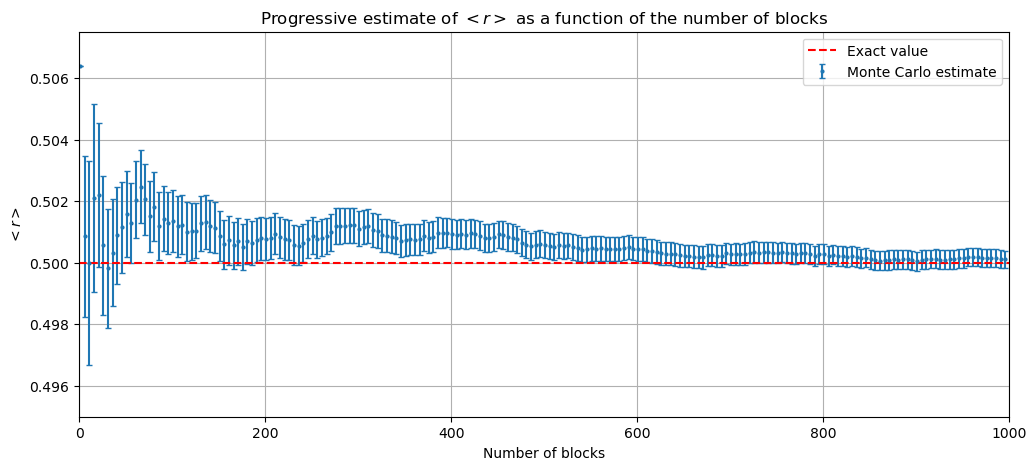

In [15]:
# Plot the progressive average
k=5  # plot one point every k blocks
plt.figure(figsize=(12,5))
plt.errorbar(rBlockNumber[::k],rMeanValueProg[::k],yerr=rStDevOfTheMeanProg[::k],fmt='.',markersize=4,capsize=2,label='Monte Carlo estimate')
plt.axhline(0.5,color='r',linestyle='--',label='Exact value')
plt.title('Progressive estimate of $<r>$ as a function of the number of blocks')
plt.xlabel('Number of blocks')
plt.ylabel(r'$<r>$')
plt.xlim(0,rBlockNumber[-1])
plt.ylim(0.495,0.5075)
plt.legend()
plt.grid(True)
plt.show()

Dal grafico si osserva che
- la stima progressiva di $⟨r⟩$ converge verso il valore atteso $1/2$, con fluttuazioni sempre minori attorno ad esso, al crescere del numero di blocchi
- la deviazione standard della media
    - diminuisce al crescere del numero di blocchi
    - dopo un certo numero di blocchi segue un andamento regolare, dato da $1/\sqrt{n}$: questo indica che ha raggiunto il regime asintotico, in cui segue la legge prevista dal teorema del limite centrale (si veda dopo). In questo regime la stima dell’errore statistico è affidabile.

I due grafici di seguito mostrano più nel dettaglio come variano le oscillazioni e l'incertezza tra inizio e fine del calcolo:

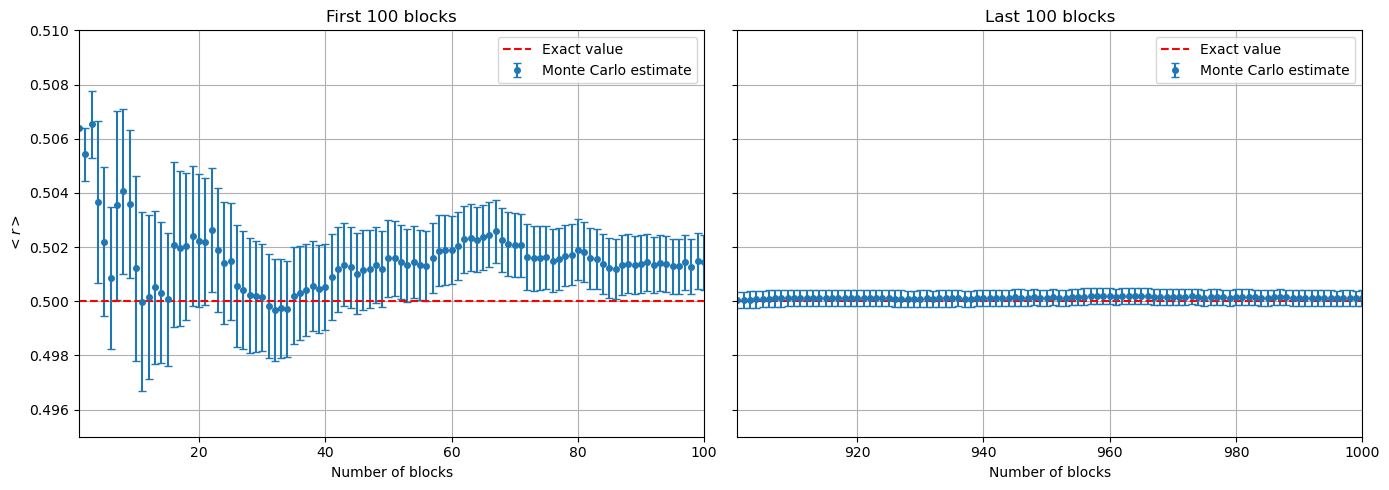

In [17]:
fig,axes=plt.subplots(1,2,figsize=(14,5),sharey=True)
# Left: first 100 blocks
axes[0].errorbar(rBlockNumber[:100],rMeanValueProg[:100],yerr=rStDevOfTheMeanProg[:100],fmt='o',markersize=4,capsize=3,label='Monte Carlo estimate')
axes[0].axhline(0.5,color='r',linestyle='--',label='Exact value')
axes[0].set_xlabel('Number of blocks')
axes[0].set_ylabel(r'$<r>$')
axes[0].set_title('First 100 blocks')
axes[0].set_xlim(1,100)
axes[0].set_ylim(0.495,0.51)
axes[0].grid(True)
axes[0].legend()
# Right: last 100 blocks
axes[1].errorbar(rBlockNumber[-100:],rMeanValueProg[-100:],yerr=rStDevOfTheMeanProg[-100:],fmt='o',markersize=4,capsize=3,label='Monte Carlo estimate')
axes[1].axhline(0.5,color='r',linestyle='--',label='Exact value')
axes[1].set_xlabel('Number of blocks')
axes[1].set_title('Last 100 blocks')
axes[1].set_xlim(rBlockNumber[-100],rBlockNumber[-1])
axes[1].set_ylim(0.495, 0.51)
axes[1].grid(True)
axes[1].legend()

plt.tight_layout()
plt.show()

Il risultato del calcolo è:

In [19]:
print(f"<r>={np.round(rMeanValueProg[-1],5)}±{np.round(rStDevOfTheMeanProg[-1],5)}")

<r>=0.50011±0.00029


che risulta compatibile statisticamente con il valore atteso entro $1\sigma$.

Il test risulta quindi superato, confermando il corretto comportamento del generatore per quanto riguarda la stima del valor medio.

#### Digressione sul teorema del limite centrale

Di seguito si intendono verificare due affermazioni citate precedentemente riguardanti il CLT:
1. le block average $r_i$ sono distribuite secondo una gaussiana con media data dal valor medio del risultato del singolo step, $\frac{1}{2}$, e deviazione standard data dalla deviazione standard del risultato del singolo step divisa per la radice del numero di step per blocco, $\frac{1}{\sqrt{12}}/\sqrt{L}$;
2. l'incertezza progressiva del calcolo $\sigma_{<r>_n}$ scala come $1/\sqrt{n}$ e alla fine vale $\frac{1}{\sqrt{12}}/L$, cioè la deviazione standard di $r_i$ divisa per $\sqrt{L}$.

Il primo punto risulta chiaro guardando i grafici di seguito:

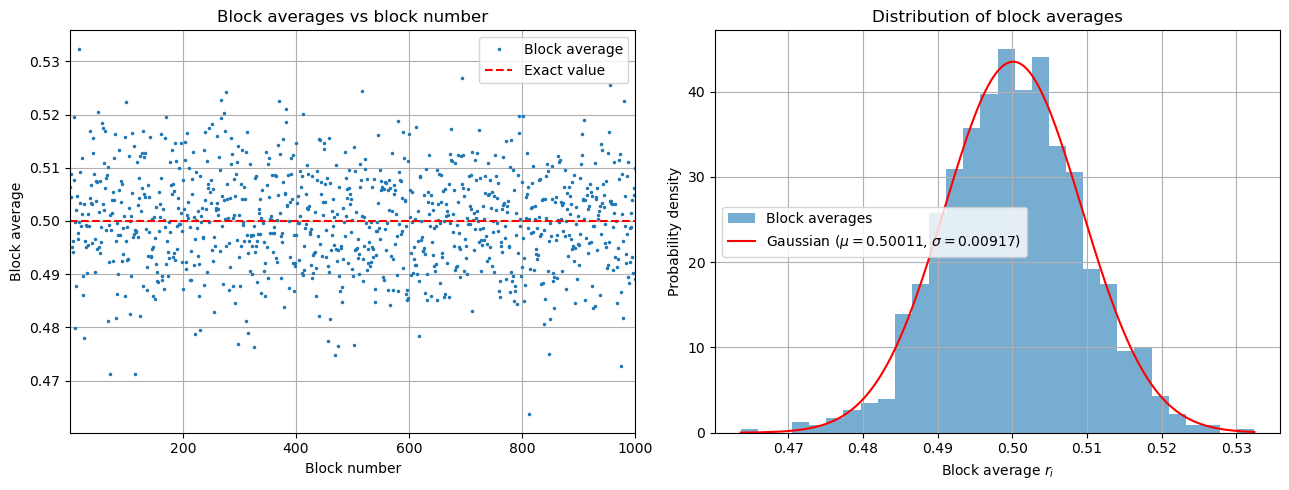

In [23]:
fig,axes=plt.subplots(1,2,figsize=(13,5))
# Left: block average vs block number
axes[0].plot(rBlockNumber,rBlockAverage,'.',markersize=3,label='Block average')
axes[0].axhline(0.5, color='r', linestyle='--', label='Exact value')
axes[0].set_xlabel('Block number')
axes[0].set_ylabel(r'Block average')
axes[0].set_title('Block averages vs block number')
axes[0].set_xlim(1,1000)
axes[0].legend()
axes[0].grid(True)
# Right: distribution of block averages
axes[1].hist(rBlockAverage,bins=30,density=True,alpha=0.6,label='Block averages')
x=np.linspace(rBlockAverage.min(),rBlockAverage.max(),500)
mu=np.mean(rBlockAverage)            # Estimate mean of block averages
sigma=np.std(rBlockAverage,ddof=1)   # Estimate standard deviation of block averages
axes[1].plot(x,norm.pdf(x,mu,sigma),'r-',label=rf'Gaussian ($\mu={np.round(mu,5)}$, $\sigma={np.round(sigma,5)}$)')   # Plot of a gaussian function with these parameters
axes[1].set_xlabel(r'Block average $r_i$')
axes[1].set_ylabel('Probability density')
axes[1].set_title('Distribution of block averages')
axes[1].legend()
axes[1].grid(True)
plt.tight_layout()
plt.show()

Dal grafico di sinistra si osserva che le block average oscillano attorno al valore atteso $1/2$ e non mostrano andamenti di deriva sistematici.

Il grafico di destra mostra la distribuzione delle block average $r_i$, che risulta ben descritta da una distribuzione gaussiana. La media della distribuzione è compatibile con $1/2$, mentre la deviazione standard è compatibile con il valore atteso dal teorema del limite centrale:

In [25]:
L=1000
print(f"Sigma del singolo blocco attesa: {np.round(1/np.sqrt(12*L),5)}")

Sigma del singolo blocco attesa: 0.00913


Per quanto riguarda il secondo punto, è stato fittato l'andamento dell'incertezza progressiva $\sigma_{<r>_n}$ in funzione del numero di blocchi $n$ con una legge di potenza con esponente variabile.

Fit results:
  B     = 0.01138 ± 4e-05
  alpha = 0.529 ± 0.001


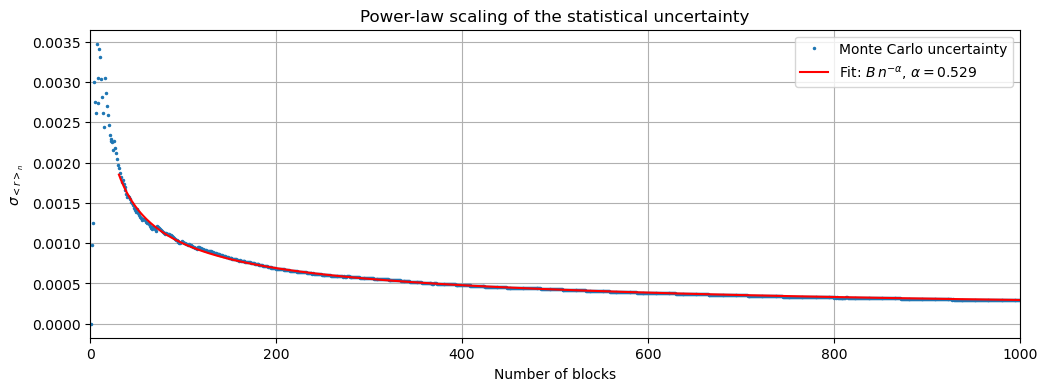

In [27]:
# Progressive uncertainty fit
def sigma_powerlaw(x,B,alpha):    # Power-law model: sigma(n)=B*x^{-alpha}
    return B*x**(-alpha)
n_min=30                          # Fit data from n_min blocks to study only the asymptotic regime
popt,pcov=curve_fit(sigma_powerlaw,rBlockNumber[n_min:],rStDevOfTheMeanProg[n_min:])
B_fit,alpha_fit=popt
B_err,alpha_err=np.sqrt(np.diag(pcov))
print(f"Fit results:")
print(f"  B     = {np.round(B_fit,5)} ± {np.round(B_err,5)}")
print(f"  alpha = {np.round(alpha_fit,3)} ± {np.round(alpha_err,3)}")

# Fitted curve
sigma_fit=sigma_powerlaw(rBlockNumber[n_min:],B_fit,alpha_fit)
plt.figure(figsize=(12,4))
plt.plot(rBlockNumber,rStDevOfTheMeanProg,'.',markersize=3,label='Monte Carlo uncertainty')
plt.plot(rBlockNumber[n_min:],sigma_fit,'r-',label=rf'Fit: $B\,n^{{-\alpha}}$, $\alpha={np.round(alpha_fit,3)}$')
plt.xlabel('Number of blocks')
plt.ylabel('$\sigma_{<r>_n}$')
plt.title('Power-law scaling of the statistical uncertainty')
plt.legend()
plt.xlim(0,1000)
plt.grid(True)
plt.show()

- Il fit viene eseguito solo nel regime asintotico (da $n≥30$), dove l'effetto delle oscillazioni iniziali è trascurabile.
- L’esponente stimato è $\alpha=0.529±0.001$, che differisce dal valore teorico $1/2$ previsto dal CLT del 6% circa.
- Il piccolo scostamento dal valore teorico può essere dovuto a effetti di finitezza (numero finito di blocchi e lunghezza dei blocchi), che impediscono di raggiungere perfettamente il regime asintotico.

Il risultato conferma che l’incertezza statistica della media scala $\sim 1/\sqrt{n}$, come atteso per una media di variabili indipendenti. Questo conferma l’affidabilità del calcolo dell’incertezza e, a posteriori, che la lunghezza del blocco $L$ è sufficientemente maggiore della lunghezza di correlazione dei numeri generati dall’RNG.

L'incertezza finale del calcolo è

In [29]:
print(np.round(rStDevOfTheMeanProg[-1],6))

0.00029


che risulta compatibile con il valore atteso $\frac{1}{\sqrt{12}L}$

In [31]:
print(np.round(1/np.sqrt(12)/L,6))

0.000289


### ii. Stima della varianza

Il secondo test consiste nel verificare che la varianza dei numeri generati sia statisticamente compatibile con la varianza di $U([0,1))$:
$$
var=\int{(r-<r>)^2U([0,1))(r)dr}=\int_0^1{(r-1/2)^2dr}=\frac{1}{12}=0.8\overline{3}
$$
Il procedimento è lo stesso del punto precedente, ma bisogna stimare $var$ e la relativa incertezza $\sigma_{var}$:
- $var$ è la varianza dei risultati del calcolo
- $\sigma_{var}$ è l’incertezza statistica sulla stima della varianza, data dalla deviazione standard della media per la stima di $var$, calcolata tramite media a blocchi

#### Calcolo e risultati

Il calcolo è stato eseguito con gli stessi parametri del precedente: $M=10^6$, $N=10^3$, $L=10^3$

Procedimento:
- Ad ogni step è stato calcolato il quadrato del numero generato dall'RNG
- Per ogni blocco è stata calcolata la media dei valori ottenuti ad ogni step: si sono ottenute le block average $(r^2)_i$
- Sono stati calcolati i valori di $<r^2>$ e $\sigma_{<r>^2}$ progressivi:
$$<r^2>_n=\frac{1}{n}\sum_{i=1}^n{(r^2)_i} \qquad \mathrm{e} \qquad  \sigma_{<r^2>_n}=\sqrt{\frac{<(r^2)^2>_n-<r^2>_n^2}{n-1}} \qquad \qquad \mathrm{per} \quad n=1,...,N$$
- Sono stati calcolati i valori di $var$ e $\sigma_{var}$ progressivi:
    - valor medio:
$$<var>_n=<r^2>_n-<r>^2 \qquad \mathrm{per} \quad n=1,...,N$$
            con $<r>^2$ quadrato del valor medio _finale_ (fissato) ottenuto per il $r$ al punto precedente (il valor medio del RNG)
    - incertezza, ottenuta con propagazione degli errori:
$$\sigma_{<var>_n}=\sqrt{\sigma^2_{<r^2>_n}+\sigma^2_{<r>^2}}$$
            con $\sigma_{<r>^2}=2<r>\sigma_{<r>}$, dove $\sigma_{<r>}$ è l'incertezza _finale_ (fissata) del calcolo sul valor medio del RNG.
Di seguito è mostrato l'andamento della media progressiva $<var>_n$ in funzione del numero di blocchi $n$, con barre di errore date dalle $\sigma_{<var>_n}$ ($\sigma_{<var>_1}=0$).

In [36]:
# Load the data
(
    varMeanValueProg,        # Progressive averages <var>: varMeanValueProg[i]=<var> estimated over the first (i+1) blocks
    varStDevOfTheMeanProg,   # Progressive statistical uncertainty of <var>: varStDevOfTheMeanProg[i]=uncertainty of varMeanValueProg[i]
    r2StDevOfTheMeanProg     # Progressive statistical uncertainty of <r^2>: r2StDevOfTheMeanProg[i]=uncertainty of the progressive mean of (r_i)^2
)=np.loadtxt(Path,usecols=(4,5,6),unpack=True)

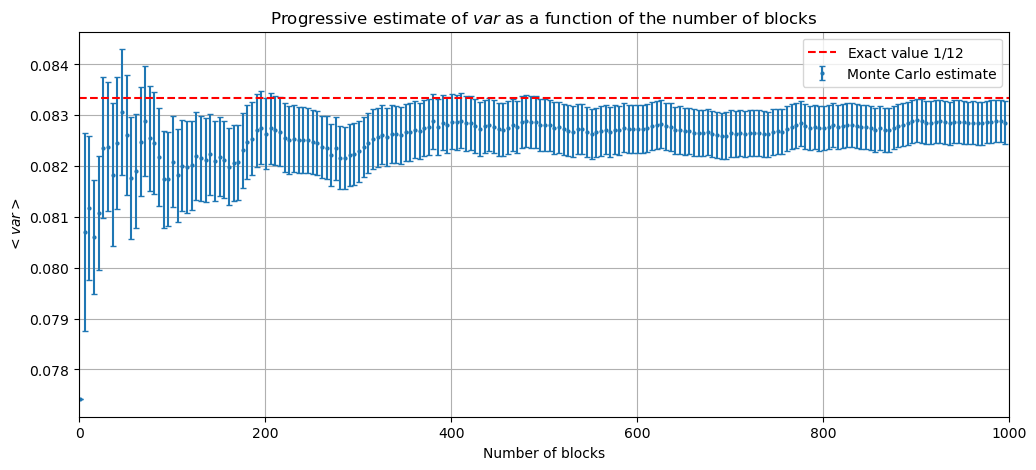

In [223]:
# Plot the progressive estimate of the variance
k = 5  # plot one point every k blocks
plt.figure(figsize=(12,5))
plt.errorbar(rBlockNumber[::k],varMeanValueProg[::k],yerr=varStDevOfTheMeanProg[::k],fmt='.',markersize=4,capsize=2,label='Monte Carlo estimate')
plt.axhline(1/12,color='r',linestyle='--',label='Exact value $1/12$')
plt.title('Progressive estimate of $var$ as a function of the number of blocks')
plt.xlabel('Number of blocks')
plt.ylabel(r'$<var>$')
plt.xlim(0,rBlockNumber[-1])
plt.ylim()
plt.legend()
plt.grid(True)
plt.show()

Dal grafico si osserva che
- la stima progressiva di $⟨var⟩$ converge statisticamente verso il valore atteso $1/12$ al crescere del numeri di blocchi
- la deviazione standard della media diminuisce al crescere del numero di blocchi, ma non segue lo stesso andamento di $\sigma_{<r>_n}$ del calcolo precedente: è l'effetto del termine $\sigma_{<r>^2}$, legato alla stima dell'errore del calcolo su $<r>$, che è costante in quanto $<r>$ è fissato al valore finale del test precedente.
 
Il risultato del calcolo è:

In [39]:
print(f"<var>={np.round(varMeanValueProg[-1],5)}±{np.round(varStDevOfTheMeanProg[-1],5)}")

<var>=0.08287±0.00041


che risulta compatibile statisticamente con il valore atteso entro $1.2\sigma$:

In [41]:
z_var=np.abs(varMeanValueProg[-1]-1/12)/varStDevOfTheMeanProg[-1]
print(np.round(z_var,2))

1.12


Il test risulta quindi superato: anche la varianza dei numeri generati è statisticamente compatibile con il valore atteso.

#### Digressione sull'incertezza del calcolo

A causa della presenza del termine $<r>^2$, calcolato nel primo test, nel calcolo di $<var>$, è stato necessario considerare il contributo del suo errore all'incertezza del calcolo $\sigma_{<var>}$. Essendo questo errore costante, l'andamento dell'incertezza progressiva $\sigma_{<var>_n}$ in regime asintotico è risultato diverso dal tipico andamento $\sim n^{-1/2}$.

Di seguito si può osservare che il comportamento dell'incertezza del solo $<r^2>$ (la quantità che il metodo Monte Carlo implementato calcola direttamente), $\sigma_{<r^2>_n}$, segue l'andamento $\sim n^{-1/2}$ in regime asintotico, in accordo con il CLT.

Fit results:
  B     = 0.00791 ± 2e-05
  alpha = 0.476 ± 0.001


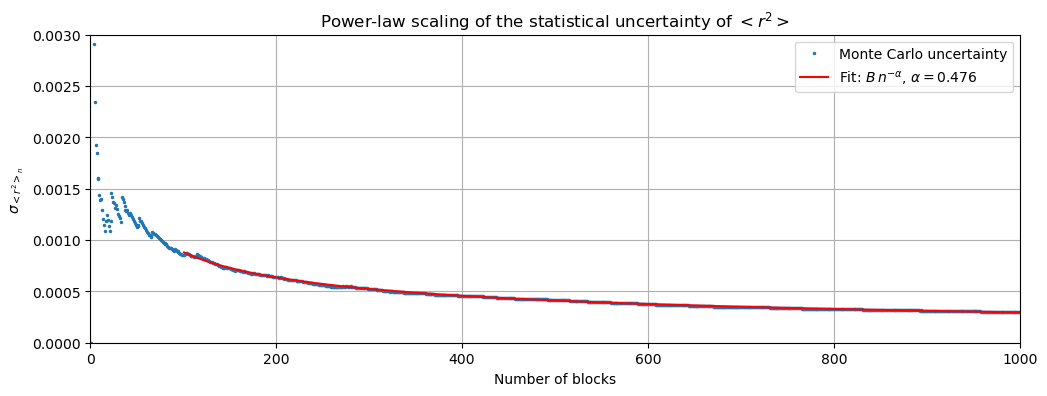

In [45]:
# Progressive uncertainty fit
n_min=100                          # Fit data from n_min blocks to study only the asymptotic regime
popt,pcov=curve_fit(sigma_powerlaw,rBlockNumber[n_min:],r2StDevOfTheMeanProg[n_min:])
B_fit,alpha_fit=popt
B_err,alpha_err=np.sqrt(np.diag(pcov))
print(f"Fit results:")
print(f"  B     = {np.round(B_fit,5)} ± {np.round(B_err,5)}")
print(f"  alpha = {np.round(alpha_fit,3)} ± {np.round(alpha_err,3)}")

# Fitted curve
sigma_fit=sigma_powerlaw(rBlockNumber[n_min:],B_fit,alpha_fit)
plt.figure(figsize=(12,4))
plt.plot(rBlockNumber,r2StDevOfTheMeanProg,'.',markersize=3,label='Monte Carlo uncertainty')
plt.plot(rBlockNumber[n_min:],sigma_fit,'r-',label=rf'Fit: $B\,n^{{-\alpha}}$, $\alpha={np.round(alpha_fit,3)}$')
plt.xlabel('Number of blocks')
plt.ylabel('$\sigma_{<r^2>_n}$')
plt.title('Power-law scaling of the statistical uncertainty of $<r^2>$')
plt.legend()
plt.xlim(0,1000)
plt.ylim(0,0.003)
plt.grid(True)
plt.show()

- Il fit è stato eseguito nel regime asintotico ($n≥100$).
- L’esponente stimato è $\alpha=0.476±0.001$, che differisce dal valore teorico $1/2$ previsto dal CLT del 5% circa. Il risultato conferma che $\sigma_{<r^2>_n}$ scala $\sim 1/\sqrt{n}$.
- Il piccolo scostamento dal valore teorico può essere dovuto a effetti di finitezza, come per il caso precedente.

Inoltre l'incertezza finale del calcolo di $<r^2>$ è

In [47]:
print(np.round(r2StDevOfTheMeanProg[-1],6))

0.000297


in accordo con il valore atteso $\frac{2}{\sqrt{45}L}\simeq0.000298$.
Infatti, anche le block average $(r^2)_i$ si distribuiscono con distribuzione gaussiana, e la varianza è pari alla varianza dei numeri $r^2$, $<(r^2-<r^2>)^2>=<r^4>-<r^2>^2=4/45$.

### iii. Test del $\chi^2$

Il terzo test consiste nel verificare che il RNG generi numeri che possono dirsi distribuiti secondo $U([0,1))$ non solo una volta che la loro sequenza è terminata, ma anche _durante l'evoluzione della sequenza_ stessa. Per fare ciò, si è svolto un **test di Pearson** del $\chi^2$.

#### Verificare che la sequenza è distribuita globalmente secondo $U([0,1))$

Applicare il test del $\chi^2$ su una sequenza di numeri pseudo-casuali permette di verificare se essa può essere considerata estratta da una data distribuzione di probabilità. Poiché i numeri non sono realmente casuali, il test non serve a _dimostrare_ che tale ipotesi sia vera, bensì a stimare la probabilità che essi _non_ siano estratti dalla data distribuzione. Se questa probabilità è sufficientemente bassa, l'ipotesi può essere ragionevolmente scartata.

_Nota:_ Non si cerca di dimostrare che una sequenza di numeri generati da un RNG sia frutto del campionamento di una data distribuzione di probabilità perché
- In questo caso, ciò è falso: i numeri sono generati da un algoritmo deterministico. Non solo casuali.
- Non è possibile dimostrare che una sequenza di dati sia estratta da una distribuzione, ma solo stimare la probabilità che _NON_ lo sia

Per eseguire il test del $\chi^2$ per verificare che il generatore sia compatibile con una distribuzione $U([0,1))$:
- Si divide $[0,1)$ in $N_{bins}$ bin uguali, e si generano $M>>N_{bins}$ numeri pseudo-casuali con l'algoritmo da testare.
- Per ogni bin (indice $i=1,...,N_{bins}$ ), si determina il numero $O_i$ di numeri pseudo-casuali che cadono al suo interno (numero di eventi _osservati_ nell'$i$-esimo bin)
- Si calcola la variabile $\chi^2$, data dalla somma delle differenze quadratiche tra numero di eventi osservati $O_i$ e attesi $E_i$ riferite alle fluttuazioni quadratiche attese (varianza della distribuzione "attesa" nel caso in cui il generatore sia compatibile con, in questo caso, $U([0,1))$):

    La probabilità che in un dato bin cadano $n$ numeri casuali estratti da $U([0,1))$ è descritta dalla distribuzione binomiale
    $$P(n)=\binom{M}{n}p^n(1-p)^{M-n} $$

    con $p=1/N_{bins}$ probabilità che un numero cada nel bin. Si hanno
    - Valore atteso di numeri che cadono nel bin: $E_i=Mp=M/N_{bins}$
    - Varianza: $\sigma_{binom}=Mp(1-p)$, che essendo $p$ molto piccola (se si fa un gran numero $M$ di prove) è approssimabile con $Mp=E_i$

    Si ha quindi $$\chi^2=\sum_{i=1}^{N_{bins}}{\frac{(O_i-E_i)^2}{E_i}}=\sum_{i=1}^{N_{bins}}{\frac{(O_i-M/N_{bins})^2}{M/N_{bins}}}$$
- Il valore di $\chi^2$ ottenuto può essere usato per stimare la probabilità per cui è lecito rigettare l'ipotesi che la sequenza generata non sia tratta dalla distribuzione $U([0,1))$.



#### Verificare che il generatore è stabile nel tempo

Il calcolo di $\chi^2$ relativo ad una sequenza permette di sapere se è possibile considerare gli $M$ numeri generati come uniformemente distribuiti in $[0,1)$. Per sapere se il RNG genera numeri distribuiti secondo $U([0,1))$ durante l'esecuzione (se è _stabile nel tempo_), e non solo alla fine, si può fare così:
- Considerata la lunghezza complessiva della sequenza per cui si vuole verificare la compatibilità con $U([0,1))$ durante la sua esecuzione, si divide tale lunghezza in $N_{tests}$ sotto-intervalli uguali
- Si esegue un test del $\chi^2$ per ogni sotto-intervallo (blocco), seguendo la procedura di prima. Così, se i blocchi sono più lunghi della lunghezza di correlazione del RNG, si ottiene una sequenza di valori di $\chi^2$ eseguiti su blocchi indipendenti. Si può determinare se i numeri in ogni blocco sono distribuiti secondo $U([0,1))$.

In altre parole, si può determinare se i numeri generati dal RNG sono distribuiti uniformemente in $[0,1)$ _mentre vengono generati_, e non soltanto se li si prende tutti insieme una volta generati tutti.

_Nota:_ Eseguendo un gran numero $N_{tests}$ di prove indipendenti, ci si aspetta che in media $(O_i-M/N_{bins})^2\simeq\sigma^2_{binom}=M/N_{bins}$, e quindi che in media $\chi^2\simeq\sum_{i=1}^{N_{bins}}{1}=N_{bins}$ (il numero di bin!). Ad essere più precisi, si può dire che per una buona riuscita del test
- i valori di $\chi^2$ devono distribuirsi in accordo alla distribuzione $\chi^2$ per $\nu=N_{bins}-1$ gradi di libertà (se i numeri sono davvero uniformemente distribuiti, ogni blocco produce un $\chi^2$ che segue una distribuzione $\chi^2$)
- il valor medio dei $\chi^2$ deve essere compatibile con il valor medio di tale distribuzione: $<\chi^2>=\nu$

#### Calcolo e risultati

Il test è stato eseguito con
- $N_{tests}=1000$
- $M=10000$ numeri generati per ogni test
- $N_{bins}=100$, per ogni test. Si ha quindi $<\chi^2>=\nu=99$

Di seguito si mostrano i valori di $\chi^2$ ottenuti per ogni test. 

In [57]:
# Load the data
PathChi2="../Es01_01/Output/chi2_test.dat"
(
    TestNumber,              # Test index (1-N_tests)
    Chi2,                    # Chi^2 value for each test: Chi2[i]=Chi^2 for test i+1
)=np.loadtxt(PathChi2,usecols=(0,1),unpack=True)

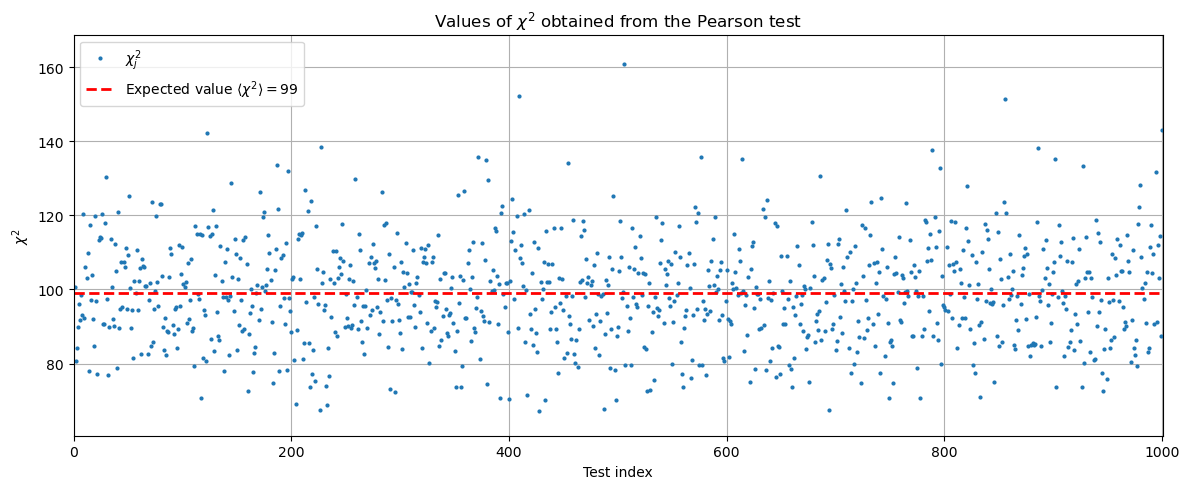

In [58]:
# Expected value of chi^2
nu=99 # Degrees of freedom=N_bins-1
Chi2Expected=nu
# Plot
plt.figure(figsize=(12,5))
plt.plot(TestNumber,Chi2,'.',markersize=4,label=r'$\chi^2_j$')
plt.axhline(Chi2Expected,color='red',linestyle='--',linewidth=2,label=rf'Expected value $\langle \chi^2 \rangle = {Chi2Expected}$')
plt.xlabel('Test index')
plt.ylabel(r'$\chi^2$')
plt.title(r'Values of $\chi^2$ obtained from the Pearson test')
plt.xlim(0,1000+1)
plt.ylim(np.min(Chi2)*0.9,np.max(Chi2)*1.05)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Si può vedere che i valori sono distribuiti attorno al valore atteso $<\chi^2>=99$, con valor medio compatibile ad esso:

In [60]:
np.mean(Chi2)

99.11194

Di seguito si confronta l'istogramma dei dati ottenuti con quello della distribuzione $\chi^2$ con $\nu=99$.

Si noti come la lunga coda di destra dell'istogramma sia in accordo con la forma attesa. L'asimmetria nella distribuzione verso i valori maggiori della media mostrata nel grafico precedente è quindi normale, e non è legata alla non-uniformità del generatore, ma alla natura della distribuzione $\chi^2$.

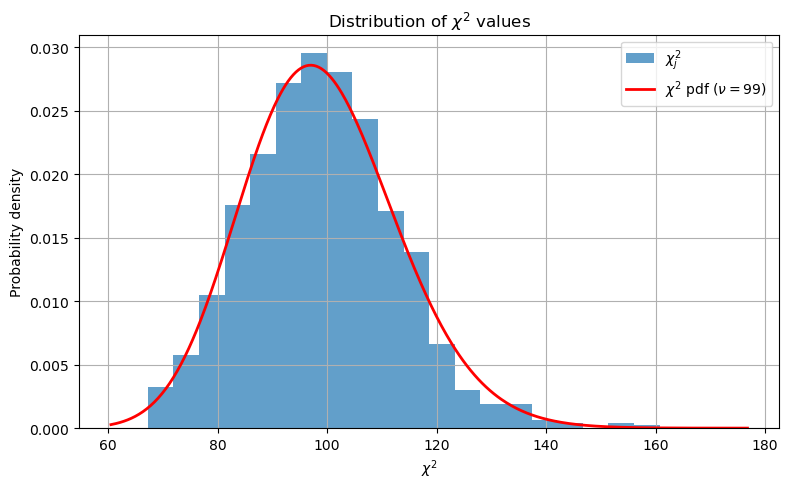

In [62]:
# Histogram of chi^2 values
plt.figure(figsize=(8,5))
plt.hist(Chi2,bins=20,density=True,alpha=0.7,label=r'$\chi^2_j$')
# Theoretical chi^2 distribution
x=np.linspace(min(Chi2)*0.9,max(Chi2)*1.1,500)
plt.plot(x,chi2.pdf(x,nu),'r-',linewidth=2,label=rf'$\chi^2$ pdf ($\nu={nu}$)')

plt.xlabel(r'$\chi^2$')
plt.ylabel('Probability density')
plt.title(r'Distribution of $\chi^2$ values')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Il test risulta quindi superato. Il RNG risulta compatibile con una distribuzione uniforme in $[0,1)$.


## <span id="Esercizio1.2" style="color:blue">  Esercizio 1.2 - Estensione del generatore e verifica del teorema del limite centrale </span>[^](#toc)

### i. Estensione del generatore

In questo esercizio, è stato esteso il RNG per generare numeri casuali distribuiti secondo
- Distribuzione esponenziale, con tasso di decadimento $\lambda\geq0$ arbitrario:
$$
\rho(x)=\left\{
\begin{array}{l}
\lambda e^{-\lambda x} \quad \text{se } x\geq 0,\\
0 \qquad \quad \text{altrimenti.}
\end{array}
\right.
$$
- Distribuzione di Cauchy-Lorentz, con centro $\mu$ e larghezza $\Gamma>0$ arbitrari:
$$\rho(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$$

Per generare sequenze numeriche che seguono tali distribuzioni, si è fatto ricorso al metodo di **inversione della cumulativa**: dato un numero pseudo-casuale $r$ estratto da $U([0,1))$ si ottiene
- un numero pseudo-casuale $x$ tratto dalla distribuzione esponenziale con la formula
$$x=-\frac{1}{\lambda}\ln(1-r)$$
- un numero pseudo-casuale $x$ tratto dalla distribuzione di Cauchy-Lorentz con la formula
$$x=\mu+\Gamma\tan(\pi(r-\frac{1}{2}))$$

Per generare quindi le suddette distribuzioni è bastato implementare queste formule in apposite funzioni che, al loro interno, richiamano l'algoritmo per la generazione di numeri uniformemente distribuiti in $[0,1)$ testato nell'esercizio precedente. 

### ii. Verifica del CLT

Il secondo punto dell'esercizio consiste nell'analizzare cosa accade quando si media un gran numero di variabili casuali estratte da una data distribuzione di probabilità. Lo studio è stato condotto tre volte, ciascuna con una diversa distribuzione. Sono state usate $U([0,1))$, la esponenziale (con $\lambda=1$) e la Cauchy-Lorentz (con $\mu=0$ e $\Gamma=1$).

Ci si aspetta che
- Poiché le prime due distribuzioni appartengono al bacino di attrazione della gaussiana, mediando un gran numero di variabili estratte da una di esse e correlate solo con un numero finito di altre variabili, si ottiene una variabile casuale distribuita normalmente, con
    - stessa media della distribuzione di origine
    - deviazione standard data dalla deviazione standard della distribuzione di origine, divisa per la radice del numero delle variabili mediate.

    Questo è il **teorema del limite centrale** (CLT).
- Poichè la distribuzione di Cauchy-Lorentz non appartiene al bacino di attrazione della gaussiana, non soddisfando le ipotesi del CLT (non possiede momenti di primo e secondo ordine finiti), la media di un gran numero di variabili estratte da essa non è una variabile distribuita normalmente. Essendo l'attrattore della Cauchy-Lorentz la Cauchy-Lorentz stessa, la media sarà distribuita secondo la Cauchy Lorentz.

Per verificare ciò, è stata calcolata la media $S_N$ di $N=1,2,10$ e $100$ variabili $x_i$ estratte da ogni distribuzione, ciascuna $M=10000$ volte.

In altre parole, data una distribuzione e fissato $N$, è stata campionata la variabile casuale
$$S_N=\frac{1}{n}\sum_{i=1}^N{x_i}$$
per $M$ (grande) volte. Il numero è sufficientemente grande per studiarne empiricamente la distribuzione 

In [71]:
# Paths
PathRannyu ="../Es01_02/Output/CLT_rannyu.dat"
PathExp    ="../Es01_02/Output/CLT_exponential.dat"
PathCauchy ="../Es01_02/Output/CLT_cauchy.dat"

# Load data
# Columns: S_N for N = 1, 2, 10, 100
Rannyu_N1, Rannyu_N2, Rannyu_N10, Rannyu_N100 =np.loadtxt(PathRannyu,unpack=True)
Exp_N1, Exp_N2, Exp_N10, Exp_N100             =np.loadtxt(PathExp,unpack=True)
Cauchy_N1, Cauchy_N2, Cauchy_N10, Cauchy_N100 =np.loadtxt(PathCauchy,unpack=True)

#### Distribuzione uniforme

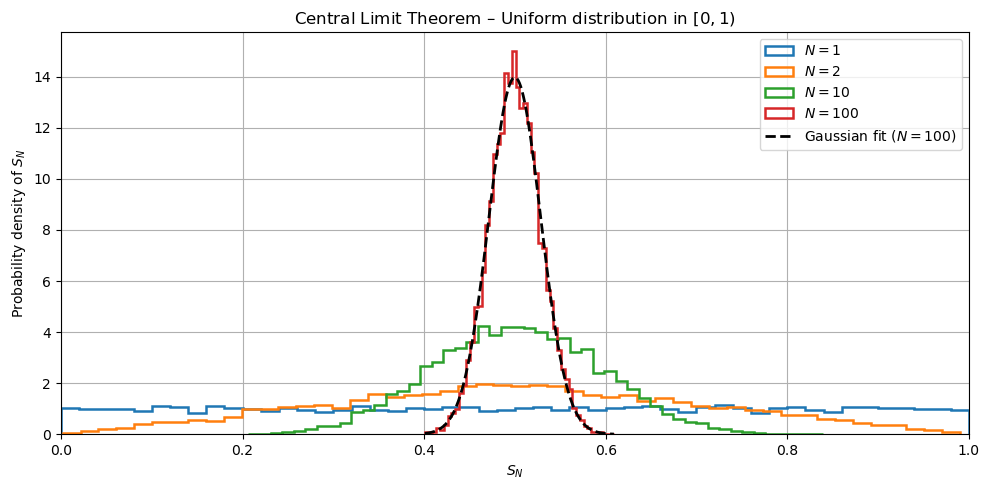

In [73]:
# Number of bins for the histograms
N_bins=50

# Plot
data = {
    1:   Rannyu_N1,
    2:   Rannyu_N2,
    10:  Rannyu_N10,
    100: Rannyu_N100
}
plt.figure(figsize=(10,5))
for N,values in data.items():
    plt.hist(values,bins=N_bins,density=True,histtype='step',linewidth=1.8,label=rf'$N={N}$')
# Gaussian fit for N = 100
mu_fit,sigma_fit=norm.fit(Rannyu_N100)
x=np.linspace(min(Rannyu_N100),max(Rannyu_N100),500)
plt.plot(x,norm.pdf(x,mu_fit,sigma_fit),'k--',linewidth=2,label=rf'Gaussian fit ($N=100$)')

plt.xlabel(r'$S_N$')
plt.ylabel('Probability density of $S_N$')
plt.title(r'Central Limit Theorem – Uniform distribution in $[0,1)$')
plt.legend()
plt.xlim(0,1)
plt.ylim()
plt.grid(True)
plt.tight_layout()
plt.show()

- Come anticipato, e come affermato dal CLT, all’aumentare del numero $N$ di variabili mediate la distribuzione della variabile media $S_N$ tende ad assumere una forma gaussiana, nonostante la forma di partenza non sia quella di una gaussiana.
- In particolare, per $N=100$ la distribuzione di $S_N$	risulta ben approssimata da una distribuzione normale, come mostrato dal fit gaussiano sovrapposto al relativo istogramma. Si ha che
    - il valor medio della distribuzione è compatibile con quello teorico: $<S_{100}>\simeq1/2$
    - la deviazione standard è compatibile con quella teorica: $\sigma_{S_{100}}\simeq\sqrt{\frac{1}{12}}/\sqrt{100}\simeq0.029$
- Si osserva inoltre che la larghezza della distribuzione si riduce progressivamente all'aumentare del numero $N$ di variabili mediate.

In [75]:
print(f"Gaussian fit (N=100):")
print(f"mu    = {np.round(mu_fit,3)}")
print(f"sigma = {np.round(sigma_fit,3)}")

Gaussian fit (N=100):
mu    = 0.5
sigma = 0.029


#### Distribuzione esponenziale

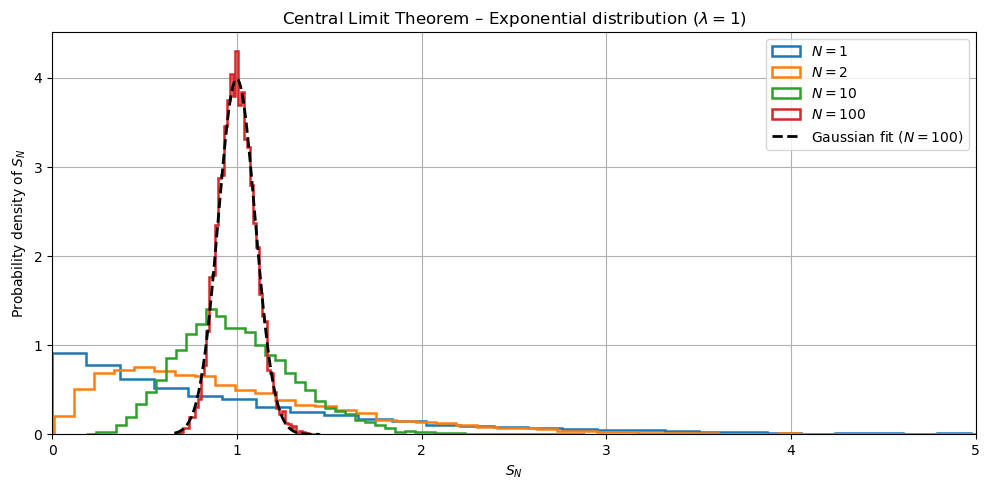

In [77]:
# Number of bins for the histograms
N_bins=50

# Plot
data = {
    1:   Exp_N1,
    2:   Exp_N2,
    10:  Exp_N10,
    100: Exp_N100
}
plt.figure(figsize=(10,5))
for N,values in data.items():
    plt.hist(values,bins=N_bins,density=True,histtype='step',linewidth=1.8,label=rf'$N={N}$')
# Gaussian fit for N = 100
mu_fit,sigma_fit=norm.fit(Exp_N100)
x=np.linspace(min(Exp_N100),max(Exp_N100),500)
plt.plot(x,norm.pdf(x,mu_fit,sigma_fit),'k--',linewidth=2,label=rf'Gaussian fit ($N=100$)')

plt.xlabel(r'$S_N$')
plt.ylabel('Probability density of $S_N$')
plt.title(r'Central Limit Theorem – Exponential distribution ($\lambda=1$)')
plt.legend()
plt.xlim(0,5)
plt.ylim()
plt.grid(True)
plt.tight_layout()
plt.show()

- Anche in questo caso si osserva il manifestarsi del CLT: al crescere di $N$, la distribuzione di $S_N$ tende ad una gaussiana.
- In particolare, per $N=100$ la distribuzione di $S_N$	risulta ben approssimata da una distribuzione normale, come mostrato dal fit gaussiano sovrapposto al relativo istogramma. Inoltre
    - il valor medio è compatibile con quello teorico: $<S_{100}>\simeq1/\lambda=1$
    - la deviazione standard è compatibile con quella teorica: $\sigma_{S_{100}}\simeq\frac{1}{\lambda}/\sqrt{100}=0.1$
- Anche qui larghezza della distribuzione si riduce progressivamente al crescere di $N$.

In [79]:
print(f"Gaussian fit (N=100):")
print(f"mu    = {np.round(mu_fit,3)}")
print(f"sigma = {np.round(sigma_fit,3)}")

Gaussian fit (N=100):
mu    = 0.999
sigma = 0.1


#### Distribuzione di Cauchy-Lorentz

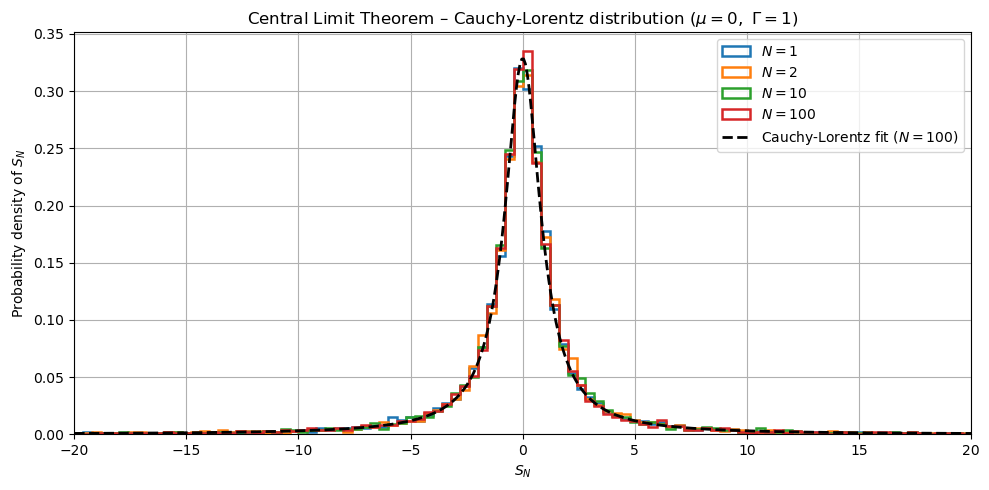

In [81]:
# Number of bins for the histograms
N_bins=100
# Range used to compute and display the histogram (for visualization purposes)
range_plot=(-20,20)

# Plot
data = {
    1:   Cauchy_N1,
    2:   Cauchy_N2,
    10:  Cauchy_N10,
    100: Cauchy_N100
}
plt.figure(figsize=(10,5))
for N,values in data.items():  # Histogram restricted to a finite range to focus on the central peak of the distribution
    plt.hist(values,bins=N_bins,range=range_plot,density=True,histtype='step',linewidth=1.8,label=rf'$N={N}$') 
    
# Cauchy-Lorentz fit for N = 100 (performed on full data, not histogram)
x0_fit,gamma_fit=cauchy.fit(Cauchy_N100)
x=np.linspace(range_plot[0],range_plot[1],500)
plt.plot(x,cauchy.pdf(x,x0_fit,gamma_fit),'k--',linewidth=2,
         label=rf'Cauchy-Lorentz fit ($N=100$)')

plt.xlabel(r'$S_N$')
plt.ylabel('Probability density of $S_N$')
plt.title(r'Central Limit Theorem – Cauchy-Lorentz distribution ($\mu=0,\ \Gamma=1$)')
plt.legend()
plt.xlim(range_plot)
plt.ylim()
plt.grid(True)
plt.tight_layout()
plt.show()


- In questo caso il teorema del limite centrale non è applicabile. Infatti, al crescere di $N$ la distribuzione di $S_N$ non tende ad una gaussiana.
- Anzi, essa rimane la medesima Cauchy-Lorentz per ogni valore di $N$: la forma della distribuzione non si modifica qualitativamente al variare di $N$. Questo comportamento riflette il fatto che la distribuzione di Cauchy–Lorentz è attrattrice di sé stessa.

## <span id="Esercizio1.3" style="color:blue">  Esercizio 1.3 - Simulazione dell'esperimento dell'ago di Buffon </span>[^](#toc)

In questo esercizio è stato simulato l'esperimento dell'ago di Buffon per il calcolo di $\pi$, considerato il primo calcolo Monte Carlo ad essere stato realizzato.

#### Descrizione

Si consideri un ago lungo $L$ che viene lanciato in modo random (posizione del suo centro e direzione sono casuali) su un piano orizzontale con linee parallele distanti $d>L$. Si può dimostrare che la probabilità che l'ago intersechi una di queste linee è $P=\frac{2L}{\pi d}$.

Dato che $P$ dipende da $\pi$, è possibile eseguire molte volte questo esperimento per valutare $\pi$:
- si lancia l'ago $N_{throws}$ volte (numero grande), e si conta il numero $N_{hit}$ di volte in cui l'ago interseca una delle linee
- si stima $P=\frac{N_{hit}}{N_{throws}}$, e si calcola $\pi=\frac{2L}{Pd}$.

Si ha quindi $$\pi=\lim_{N_{throws} \to \infty}{\frac{2LN_{throws}}{N_{hit}d}}$$

Per simulare l'esperimento, bisogna simulare il lancio dell'ago: per ogni lancio, si generano la posizione del centro dell'ago e la sua direzione. Data la simmetria del problema, si è considerato il problema equivalente, più semplice, in cui il centro dell'ago cade sempre entro due sole linee. Di conseguenza, supponendo che le due linee parallele siano descritte dalle equazioni $y=\pm d/2$ e scegliendo l'asse $x$ in modo che il centro dell'ago abbia ascissa $x_c=0$,
- l'ordinata del centro dell'ago, $y_c$, è stata generata come un numero estratto dalla distribuzione $U([-d/2,d/2))$
- la direzione dell'ago _non_ è stata generata come un numero estratto da $U([0,2\pi))$, per non utilizzare il valore già noto di $\pi$ nel calcolo di $\pi$ stesso. È stata scelta una tecnica di rigetto:
    - si genera un punto $\vec{r_0}=(x_0,y_0)$, con $x_0$ estratta da $U([0,1))$ e $y_0$ estratta da $U([-1,1))$. $\vec{r_0}$ individua una direzione compresa tra $-90°$ e $+90°$ rispetto all'asse $x$. Si noti che una delle due estremità dell'ago cade sempre in questo range di angoli attorno all'asse $x$, e quindi $\vec{r_0}$ rappresenta tutte le possibili direzioni in cui l'ago può puntare.
    - Perché si generino direzioni uniformemente distribuite in $[-90°,90°)$, è necessario aggiungere uno step: deve valere che $\vec{r_0}<1$ (il punto deve essere interno alla circonferenza goniometrica). Per questo motivo, il punto $\vec{r_0}$ viene tenuto se $r_0=|\vec{r_0}|\leq1$ e viene rigettato altrimenti.

Un lancio è quindi rappresentato da $y_c$, estratto da $U([-d/2,d/2))$, e dal primo valore accettato di $(x_0,y_0)$, che equivale ad un angolo estratto da $U([0,2\pi))$ ma è ottenuto senza dover utilizzare il valore numerico di $\pi$.

L'ago interseca una delle due linee se si ha che $y_c+\frac{|y_0|}{r_0}\frac{L}{2}>\frac{d}{2}$ oppure $y_c-\frac{|y_0|}{r_0}\frac{L}{2}<-\frac{d}{2}$.

#### Calcolo e risultati

Il calcolo è stato eseguito con
- $L=1$ e $d=1.2$. Non è stato scelto un valore di $d\gg L$ per non avere un valore di $P$ troppo basso, il che avrebbe richiesto un numero molto elevato di lanci per poterla stimare in modo preciso.
- $M=10^7$ simulazioni del lancio dell'ago. Per ogni lancio, si è verificato se l'ago ha intersecato una delle due linee
- $N=10^3$ blocchi (ciascuno lungo $N_{throws}=M/N=10^4$ lanci). In ogni blocco, si è calcolato $N_{hit}$ e si è ottenuta una stima di $\pi$, detta $\pi_i$, dove $i$ è l'indice del blocco.

Il risultato è espresso in accordo con quanto fatto negli esercizi precedenti:
- il valor medio progressivo del calcolo è dato da $$<\pi>_n=\frac{1}{n}\sum_{i=1}^n{\pi_i}$$
- l'incertezza progressiva è data da $$\sigma_{<\pi>_n}=\sqrt{\frac{<\pi^2>_n-<\pi>_n^2}{n-1}}$$
    dove $ n=1,...,N$ è il numero di blocchi considerati nella media, partendo dal primo.
- valor medio e incertezza (finali) del calcolo sono dati da $<\pi>=<\pi>_N$ e $\sigma_{<\pi>}=\sigma_{<\pi>_N}$

Di seguito si mostra l'andamento della stima progressiva di $\pi$, $<\pi>_n$, al variare di $n$. Le barre di errore sono date dall'incertezza progressiva associata, $\sigma_{<\pi>_n}$, calcolata con la media a blocchi.

In [85]:
# Load the data
Path = "../Es01_03/Output/buffon_pi.dat"
(
    piBlockNumber,            # Block indexes (1–N)
    piBlockValue,             # Block estimates: piBlockValue[i] = pi estimate of block i+1
    piMeanValueProg,          # Progressive averages <pi>: piMeanValueProg[i] = <pi> over the first (i+1) blocks
    piStDevOfTheMeanProg      # Progressive statistical uncertainty of <pi>
)=np.loadtxt(Path,usecols=(0,1,2,3),unpack=True)

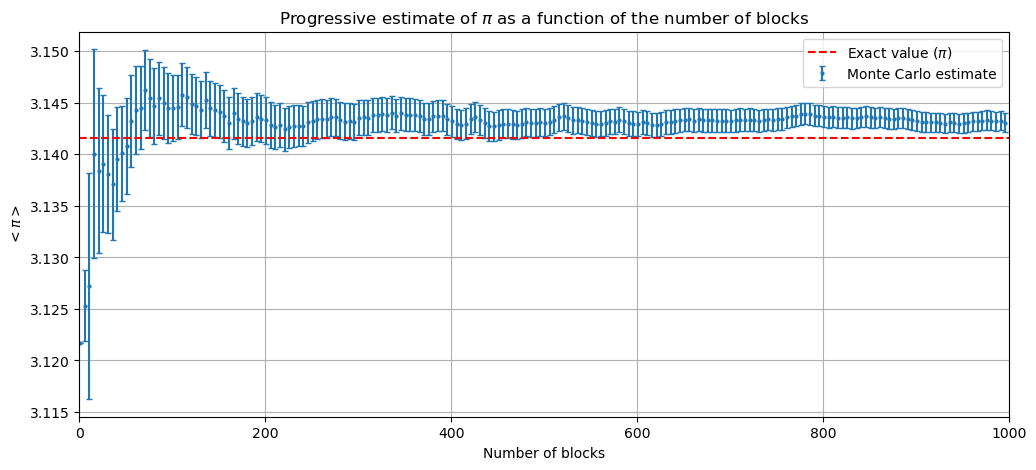

In [225]:
# Plot the progressive estimate of pi
k=5  # plot one point every k blocks
plt.figure(figsize=(12,5))
plt.errorbar(piBlockNumber[::k],piMeanValueProg[::k],yerr=piStDevOfTheMeanProg[::k],fmt='.',markersize=4,capsize=2,label='Monte Carlo estimate')
plt.axhline(np.pi,color='r',linestyle='--',label=r'Exact value ($\pi$)')
plt.title('Progressive estimate of $\pi$ as a function of the number of blocks')
plt.xlabel('Number of blocks')
plt.ylabel(r'$<\pi>$')
plt.xlim(0,piBlockNumber[-1])
plt.legend()
plt.grid(True)
plt.show()

- Dopo una fase iniziale caratterizzata da grandi fluttuazioni statistiche (dovute al numero ridotto di dati), la stima converge stabilmente verso il valore teorico di $\pi$.
- All’aumentare del numero di blocchi l’incertezza statistica diminuisce.

Altre osservazioni sarebbero analoghe a quelle già fatte nell'_Esercizio 1.1_ e sono perciò omesse per brevità.

La stima finale $<\pi>=<\pi>_{N}$ risulta statisticamente compatibile con il valore teorico entro $2\sigma$, confermando la correttezza dell’algoritmo Monte Carlo implementato.

In [220]:
print(f"π_calc={np.round(piMeanValueProg[-1],5)}±{np.round(piStDevOfTheMeanProg[-1],5)}")
print(f"π_real={np.round(np.pi,5)}")
z=(piMeanValueProg[-1]-np.pi)/piStDevOfTheMeanProg[-1]
print(f"z={np.round(z,2)}")

π_calc=3.14307±0.00093
π_real=3.14159
z=1.6
